In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [17]:
# Clusters dasta
clusters = [
    {"mean": [-6, 8], "cov": [[0.4, 0], [0, 0.4]]},
    {"mean": [-4, 7], "cov": [[1, 2], [2, 5]]},
    {"mean": [8, -6], "cov": [[0.4, 0], [0, 0.4]]},
    {"mean": [4, -10], "cov": [[1, 2], [2, 5]]}
]

# Generate the dta points
data = []
for cluster in clusters:
    points = np.random.multivariate_normal(cluster["mean"], cluster["cov"], 100)
    data.append(points)

# Concatenate all data points
data = np.vstack(data)

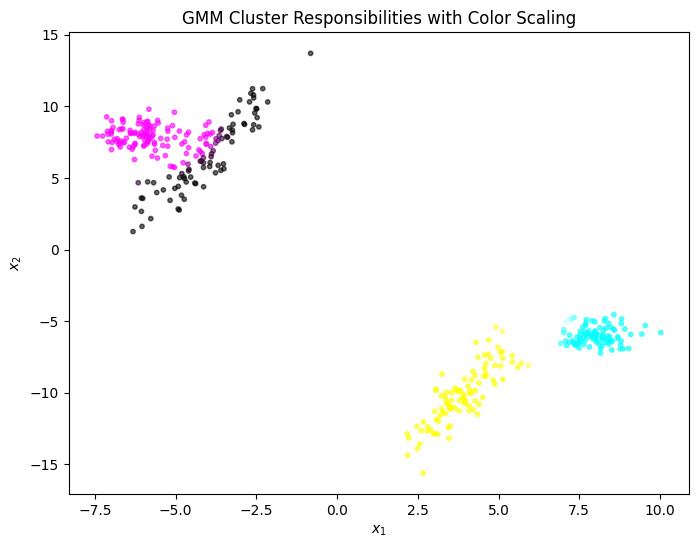

In [ ]:
# Fit a Gaussian Mixture Model with 4 components
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=0)
gmm.fit(data)

# Predict the responsibilities for each data point
responsibilities = gmm.predict_proba(data)

# Colors for each of the clusters
cmyk_colors = np.array([
    [255, 0, 0, 0],  # Cyan
    [0, 255, 0, 0],  # Magenta
    [0, 0, 255, 0],  # Yellow
    [0, 0, 0, 255]   # Black
])

# Keeps the rgb value of each data point
rgb_data = np.zeros((data.shape[0], 3))

# Assigns rgb values to each data point
for i in range(4):
    # Normalizes the CMYK values to the range [0, 1]
    c, m, y, k = cmyk_colors[i] / 255
    
    # Calculate the RGB values
    rgb_colors = np.zeros((data.shape[0], 3))
    rgb_colors[:, 0] = (1 - c) * (1 - k) * 255
    rgb_colors[:, 1] = (1 - m) * (1 - k) * 255
    rgb_colors[:, 2] = (1 - y) * (1 - k) * 255
    
    # Assign the RGB values to the data points
    rgb_data += responsibilities[:, i][:, np.newaxis] * rgb_colors

# Ensure RGB values are within the range [0, 1]
rgb_data = np.clip(rgb_data, 0, 1)

# Plot the data with color based on responsibilities
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], color=rgb_data, s=10, alpha=0.6)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title("GMM Cluster Responsibilities with Color Scaling")
plt.show()